<a href="https://colab.research.google.com/github/shimo23333/CLIP-ColorCulture/blob/main/%E4%BD%BF%E7%94%A8_CLIP_%E6%A8%A1%E5%9E%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E4%B8%AD%E8%8B%B1%E6%96%87%E6%83%85%E7%B7%92%E8%A9%9E%E5%BD%99%E7%9A%84%E8%AA%9E%E6%84%8F%E5%B7%AE%E7%95%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📌 Step 1: 安裝與匯入套件
# 本區段安裝與匯入專案所需的所有 Python 套件與函式庫，例如翻譯（googletrans）、圖像處理（PIL）、色票分析（skimage）、視覺模型（CLIP）等。
!pip install -q git+https://github.com/openai/CLIP.git
!pip install -q googletrans==4.0.0rc1
!pip install -q scikit-image

import torch
import clip
from PIL import Image
import requests
from io import BytesIO
from googletrans import Translator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.81.0 requires httpx<1,>=0.23.0, but you have httpx 0.13.3 which is incompatible.
google-genai 1.16.1 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.13.3 which is incompatible.
langsm

In [3]:
# 📌 Step 2: 設定 CLIP 模型與設備
# 此區段載入 CLIP 模型（ViT-B/32）並設定運算設備（GPU or CPU）。
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:19<00:00, 18.2MiB/s]


In [4]:
# 📌 Step 3: 翻譯輸入的中文情緒詞至中英日韓四語
# 使用 Google Translate 將中文詞語分別翻譯為英文、日文與韓文，便於後續生成語言專屬圖像。
translator = Translator()

def translate_all(text):
    translations = {
        "zh": text,
        "en": translator.translate(text, src='zh-cn', dest='en').text,
        "ja": translator.translate(text, src='zh-cn', dest='ja').text,
        "ko": translator.translate(text, src='zh-cn', dest='ko').text,
    }
    return translations

In [5]:
# 📌 Step 4: 模擬圖像生成（可後續替換為 DALL·E）
# 本區為簡化流程，使用預設圖像 URL 來模擬多語圖像生成結果。
def generate_image_mock(language, text):
    # 實際可替換為 DALL·E 或其他生成模型 API 呼叫
    return "https://picsum.photos/300/200?random=1"

In [6]:
# 📌 Step 5: 主色分析函式
# 將圖片轉為 RGB 與 LAB 色彩空間後，使用 k-means 分群提取圖片主色調。
def extract_dominant_colors(image_url, n_colors=3):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img_np = np.array(img)
    img_np = img_np.reshape((-1, 3))

    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(img_np)
    colors = kmeans.cluster_centers_.astype(int)

    # 轉換為 LAB 色彩空間
    colors_lab = rgb2lab(np.reshape(colors / 255, (-1, 1, 3))).reshape(-1, 3)
    return colors, colors_lab

In [7]:
# 📌 Step 6: 繪製色票圖
# 以視覺化方式展示各語言生成圖像的主色票，包含 RGB 色塊與 LAB 數值。
def plot_color_patches(color_dict):
    fig, axs = plt.subplots(1, len(color_dict), figsize=(15, 3))
    for i, (lang, (rgb_colors, lab_colors)) in enumerate(color_dict.items()):
        patch = np.zeros((50, 150, 3), dtype=np.uint8)
        for j, color in enumerate(rgb_colors):
            patch[:, j*50:(j+1)*50] = color
        axs[i].imshow(patch)
        axs[i].axis('off')
        axs[i].set_title(f"{lang}\n{np.round(lab_colors, 2)}")
    plt.tight_layout()
    plt.show()

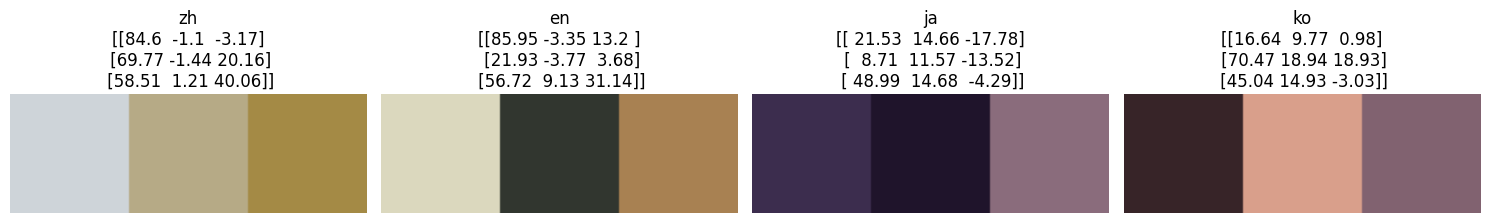

In [8]:
# 📌 Step 7: 整體流程執行
# 執行整體流程：翻譯、生成圖像、分析主色、視覺化色票差異。
input_text = "溫暖"
translations = translate_all(input_text)
color_data = {}

for lang, text in translations.items():
    image_url = generate_image_mock(lang, text)
    rgb_colors, lab_colors = extract_dominant_colors(image_url)
    color_data[lang] = (rgb_colors, lab_colors)

plot_color_patches(color_data)